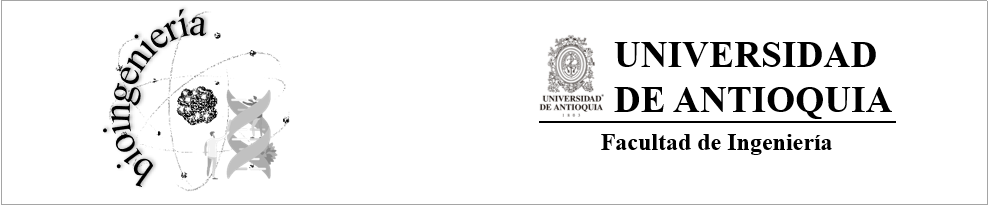

# Redes Neuronales Recurrentes - Recurrent Neural Networks (RNN)

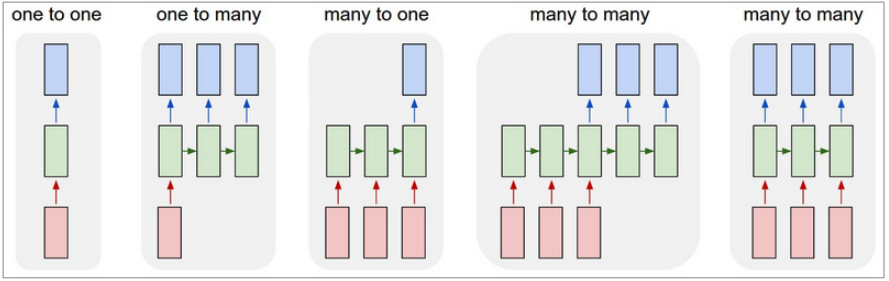

### Miremos un ejemplo desde la intuición

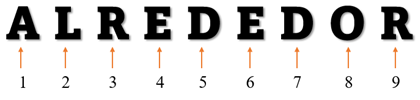

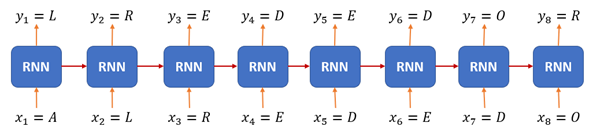

### Pero... ¿Qué es eso de la tal memoria?

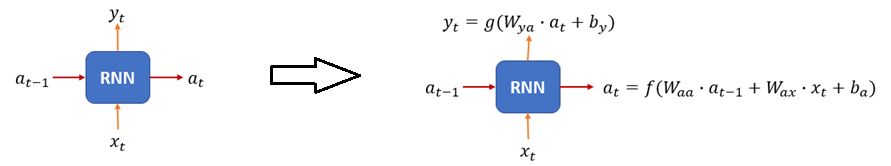

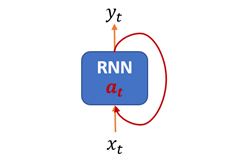

## Ejercicio práctico

Vamos a construir una Red Neuronal Recurrente que pediga nombres de dinosaurios, para entrenar la red usaremos una conjunto de datos que tiene 1536 nombre de dinosarios. La finalizar la fase de entrenamiento, le pediremos a la red que nos prediga 80 posibles nombre de dinosaurios.

Tomado de: www.codificandobits.com

In [2]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=c98252d40f035085c3e06ee65d62dc63262228c409a95c1512b157f7123843ad
  Stored in directory: /root/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [1]:
import numpy as np
np.random.seed(5)

import tensorflow as tf
from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras import backend as K

# 1. Carga del Conjuto de datos o dataset

In [2]:
# https://github.com/angelower/infomed20251/blob/main/data/nombres_dinosaurios.txt
!wget https://raw.githubusercontent.com/angelower/infomed20251/main/data/nombres_dinosaurios.txt



--2025-05-27 12:51:17--  https://raw.githubusercontent.com/angelower/infomed20251/main/data/nombres_dinosaurios.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21444 (21K) [text/plain]
Saving to: ‘nombres_dinosaurios.txt’

nombres_dinosaurios 100%[===================>]  20.94K  --.-KB/s    in 0.02s   

2025-05-27 12:51:17 (1.07 MB/s) - ‘nombres_dinosaurios.txt’ saved [21444/21444]



In [3]:
nombres = open('nombres_dinosaurios.txt','r').read()
nombres = nombres.lower()

# Crear diccionario (listado de caracteres que no se repiten)
alfabeto = list(set(nombres))
tam_datos, tam_alfabeto = len(nombres), len(alfabeto)
print(f"En total hay {tam_datos} caracteres, y el diccionario tiene un tamaño de {tam_alfabeto} caracteres.")


En total hay 19909 caracteres, y el diccionario tiene un tamaño de 27 caracteres.


In [5]:
print(nombres)

aachenosaurus
aardonyx
abdallahsaurus
abelisaurus
abrictosaurus
abrosaurus
abydosaurus
acanthopholis
achelousaurus
acheroraptor
achillesaurus
achillobator
acristavus
acrocanthosaurus
acrotholus
actiosaurus
adamantisaurus
adasaurus
adelolophus
adeopapposaurus
aegyptosaurus
aeolosaurus
aepisaurus
aepyornithomimus
aerosteon
aetonyxafromimus
afrovenator
agathaumas
aggiosaurus
agilisaurus
agnosphitys
agrosaurus
agujaceratops
agustinia
ahshislepelta
airakoraptor
ajancingenia
ajkaceratops
alamosaurus
alaskacephale
albalophosaurus
albertaceratops
albertadromeus
albertavenator
albertonykus
albertosaurus
albinykus
albisaurus
alcovasaurus
alectrosaurus
aletopelta
algoasaurus
alioramus
aliwalia
allosaurus
almas
alnashetri
alocodon
altirhinus
altispinax
alvarezsaurus
alwalkeria
alxasaurus
amargasaurus
amargastegos
amargatitanis
amazonsaurus
ammosaurus
ampelosaurus
amphicoelias
amphicoelicaudia
amphisaurus
amtocephale
amtosaurus
amurosaurus
amygdalodon
anabisetia
anasazisaurus
anatosaurus
anatotitan

### Conversión de caracteres a índices y viceversa

In [6]:
# Conversión de caracteres a índices y viceversa
car_a_ind = { car:ind for ind,car in enumerate(sorted(alfabeto))}
ind_a_car = { ind:car for ind,car in enumerate(sorted(alfabeto))}
print(car_a_ind)
print(ind_a_car)


{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '\n', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


# 2. Creación del modelos de la RNN

In [7]:
n_a = 25    # Número de unidades en la capa oculta
entrada  = Input(shape=(None,tam_alfabeto))
a0 = Input(shape=(n_a,))

celda_recurrente = SimpleRNN(n_a, activation='tanh', return_state = True)
capa_salida = Dense(tam_alfabeto, activation='softmax')

salida = []
hs, _ = celda_recurrente(entrada, initial_state=a0)
salida.append(capa_salida(hs))
modelo = Model([entrada,a0],salida)
print(modelo.summary())


2025-05-27 12:56:22.547409: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-27 12:56:22.547503: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-27 12:56:22.547518: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-27 12:56:22.547717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-27 12:56:22.547738: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None, 27)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn          │ [(None, 25),      │      1,325 │ input_layer[0][0… │
│ (SimpleRNN)         │ (None, 25)]       │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 27)        │        702 │ simple_rnn[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,027 (7.92 KB)

 Trainable params: 2,027 (7.92 KB)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
modelo.compile(optimizer='sgd', loss='categorical_crossentropy')

# Ejemplos de Entrenamiento del modelo

### Crear lista con ejemplos de entrenamiento y mezclarla aleatoriamente

In [9]:
with open("nombres_dinosaurios.txt") as f:
    ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]
np.random.shuffle(ejemplos)
ejemplos[:10]

['sinosaurus',
 'bonitasaura',
 'stegosaurides',
 'rapator',
 'pareiasaurus',
 'apatodon',
 'ningyuansaurus',
 'saurophagus',
 'tangvayosaurus',
 'harpymimus']

### Crear ejemplos de entrenamiento usando un generador

In [13]:
def train_generator():
    while True:
        # Tomar un ejemplo aleatorio
        ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]

        # Convertir el ejemplo a representación numérica
        X = [None] + [car_a_ind[c] for c in ejemplo]

        # Crear "Y", resultado de desplazar "X" un caracter a la derecha
        Y = X[1:] + [car_a_ind['\n']]

        # Representar "X" y "Y" en formato one-hot
        x = np.zeros((len(X),1,tam_alfabeto))
        onehot = to_categorical(X[1:],tam_alfabeto).reshape(len(X)-1,1,tam_alfabeto)
        x[1:,:,:] = onehot
        y = to_categorical(Y,tam_alfabeto).reshape(len(X),tam_alfabeto)

        # Activación inicial (matriz de ceros)
        a = np.zeros((len(X), n_a))

        yield (x, a), y

# 4. Entrenamiento

In [21]:
import datetime

tic = datetime.datetime.now()

BATCH_SIZE = 80			# Número de ejemplos de entrenamiento a usar en cada iteración
NITS = 1000			# Número de iteraciones

for j in range(NITS):
    historia = modelo.fit(train_generator(), steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)

    # Imprimir evolución del entrenamiento cada 1000 iteraciones
    if j%100 == 0:
        print('Iteración: %d, Error: %f' % (j, historia.history['loss'][0]))

toc = datetime.datetime.now()
print("Delay: " , toc-tic)

Iteración: 0, Error: 2.192996
Iteración: 100, Error: 2.110626
Iteración: 200, Error: 2.182853
Iteración: 300, Error: 2.141897
Iteración: 400, Error: 2.251062
Iteración: 500, Error: 2.217425


KeyboardInterrupt: 

In [19]:
train_generator()

<generator object train_generator at 0x30d0e3c10>

# 5. Generación de nombres de dinosaurios

In [20]:
from tensorflow.keras import backend as K
def generar_nombre(modelo,car_a_num,tam_alfabeto,n_a):
    # Inicializar x y a con ceros
    x = np.zeros((1,1,tam_alfabeto,))
    a = np.zeros((1, n_a))

    # Nombre generado y caracter de fin de linea
    nombre_generado = ''
    fin_linea = '\n'
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando la celda RNN
          a, _ = celda_recurrente(K.constant(x), initial_state=K.constant(a))
          y = capa_salida(a)
          prediccion = K.eval(y)

          # Escoger aleatoriamente un elemento de la predicción (el elemento con
          # con probabilidad más alta tendrá más opciones de ser seleccionado)
          ix = np.random.choice(list(range(tam_alfabeto)),p=prediccion.ravel())

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          car = ind_a_car[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1)
          x = to_categorical(ix,tam_alfabeto).reshape(1,1,tam_alfabeto)
          a = K.eval(a)

          # Actualizar contador y continuar
          contador += 1

          # Agregar fin de línea al nombre generado en caso de tener más de 50 caracteres
          if (contador == 50):
            nombre_generado += '\n'

    print(nombre_generado)

# Generar 100 ejemplos de nombres generados por el modelo ya entrenado
for i in range(100):
    generar_nombre(modelo,car_a_ind,tam_alfabeto,n_a)

olos

aurtosalopsat

qaproo

en

zgagns

agronasata

asaun

riprangasaloloryantenwoppasa

enr

a

urusatsanilatosaloladausettis

yausgas

tasanhoncphusanghipsaur

s

ralauroni

uraua

thonobians

aciirtracasatalacatanprovusinhias

tosaaerans

igiosinnodozsatsanisyvtpyis

usalobaltsg

astorusyosanabioeznorucs

pyos

a

ausanprapanos

nuudiuryqurustpgsadsaloirusopsacrahgapmataron

oriitlen

i

dktigsagios

wilnrlliltucansaqsopamas

gubusas

yana

s

dalbeobs

ucauracoribrapruitula

giytarhoe

holon

apthyaraus

cngtaratauraus

uros

hila

otiotanttosantosaatatenatapalghcyibavavasanacak

lhidauronyitaltaanss

is

ltegrusa

hudrungilds

ntaltgalpusaloiatorururamausalashatusanconasildusa

s

rudyos

ntirus

n

or

eemous

c



apnhsrongenal

osopphxs

hopbosoncas

er



ams

iasa

us

xorfpopdedaus

s

tans

upauseaumopus

aelannteur

a

oyuron

anorilaocitasaisaas

pdruppoltosa

aucohuatptos

taurialtosatitaus

exneandoazataus

a

otaapyayras

itus

s

risopaciaa

diatassoyiatas

oniothwts